In [1]:
library("deMULTIplex")
library("ggplot2")

Warning message:
“replacing previous import ‘lifecycle::last_warnings’ by ‘rlang::last_warnings’ when loading ‘tibble’”


In [2]:
## deMULTIplexing ##
setwd("/project/ABKlab/Natalia/sc-RNA-seq/single_TLS_project")

# Table 120h_2

In [3]:
bartable_120h_2 <- readRDS("./files/bartable_120h_2.rds")

In [4]:
head(bartable_120h_2)
dim(bartable_120h_2)

,Bar1,Bar2,Bar3,Bar4,Bar5,Bar6,Bar7,Bar8,Bar9,Bar10,⋯,Bar17,Bar18,Bar19,Bar20,Bar21,Bar22,Bar23,Bar24,nUMI,nUMI_total
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
AAACCCAAGAAGTCCG,12,34,2,3,4,6,4,7,37,32,⋯,12,7,1,3,184,4,6,3,403,482
AAACCCAAGACAACTA,0,0,0,0,1,0,9,1,0,0,⋯,23,1,0,1,41,3,1,0,88,103
AAACCCAAGAGCAGCT,7,7,5,2,2,4,2,6,6,6,⋯,8,6,3,1,4,4,11,8,144,204
AAACCCACACTTGAGT,4,0,3,1,3,8,1,9,6,5,⋯,10,5,4,0,1,8,5,6,1425,1703
AAACCCACAGGACTAG,3,1,6,132,4,8,9,3,5,3,⋯,8,5,1,3,2,5,7,14,253,308
AAACCCAGTATCCCTC,1,3,4,2,4,188,3,2,4,6,⋯,7,6,2,4,1,5,4,6,280,322


[1] 12750    26

In [5]:
x <- bartable_120h_2
initial_cell_number <- nrow(bartable_120h_2)

## demultiplexing: classification

In [6]:
## Visualize barcode space
bar.tsne <- barTSNE(x[,1:24]) # number of barcodes and not columns !!
## Note: Exclude columns 97:98 (assuming 96 barcodes were used) which provide total barcode UMI counts for each cell. 

pdf("./outputs/MULTIseq/120h_2_bc.check.pdf")
for (i in 3:ncol(bar.tsne)) {
  g <- ggplot(bar.tsne, aes(x = TSNE1, y = TSNE2, color = bar.tsne[,i])) +
    geom_point() +
    scale_color_gradient(low = "black", high = "red") +
    ggtitle(colnames(bar.tsne)[i]) +
    theme(legend.position = "none") 
  print(g)
}
dev.off()


Loading required package: Rtsne



Performing PCA
Read the 12750 x 24 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
 - point 10000 of 12750
Done in 6.83 seconds (sparsity = 0.010968)!
Learning embedding...
Iteration 50: error is 98.437019 (50 iterations in 2.19 seconds)
Iteration 100: error is 95.605460 (50 iterations in 2.24 seconds)
Iteration 150: error is 89.988732 (50 iterations in 2.13 seconds)
Iteration 200: error is 89.396854 (50 iterations in 2.16 seconds)
Iteration 250: error is 89.299820 (50 iterations in 2.20 seconds)
Iteration 300: error is 3.325583 (50 iterations in 2.12 seconds)
Iteration 350: error is 2.978338 (50 iterations in 2.04 seconds)
Iteration 400: error is 2.801557 (50 iterations in 2.02 seconds)
Iteration 450: error is 2.689727 (50 iterations in 1.98 seconds)
Iteration 500: error is 2.612123 (50 iterations in 1.99 seconds)
Iteration 550: error is 2.554880 (50 iterations in 1

png 
  2

[1] 0.01


Loading required package: KernSmooth

KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009



[1] 0.03
[1] 0.05
[1] 0.07
[1] 0.09
[1] 0.11
[1] 0.13
[1] 0.15
[1] 0.17
[1] 0.19
[1] 0.21
[1] 0.23
[1] 0.25
[1] 0.27
[1] 0.29
[1] 0.31
[1] 0.33
[1] 0.35
[1] 0.37
[1] 0.39
[1] 0.41
[1] 0.43
[1] 0.45
[1] 0.47
[1] 0.49
[1] 0.51
[1] 0.53
[1] 0.55
[1] 0.57
[1] 0.59
[1] 0.61
[1] 0.63
[1] 0.65
[1] 0.67
[1] 0.69
[1] 0.71
[1] 0.73
[1] 0.75
[1] 0.77
[1] 0.79
[1] 0.81
[1] 0.83
[1] 0.85
[1] 0.87
[1] 0.89
[1] 0.91
[1] 0.93
[1] 0.95
[1] 0.97
[1] 0.99


Loading required package: reshape2



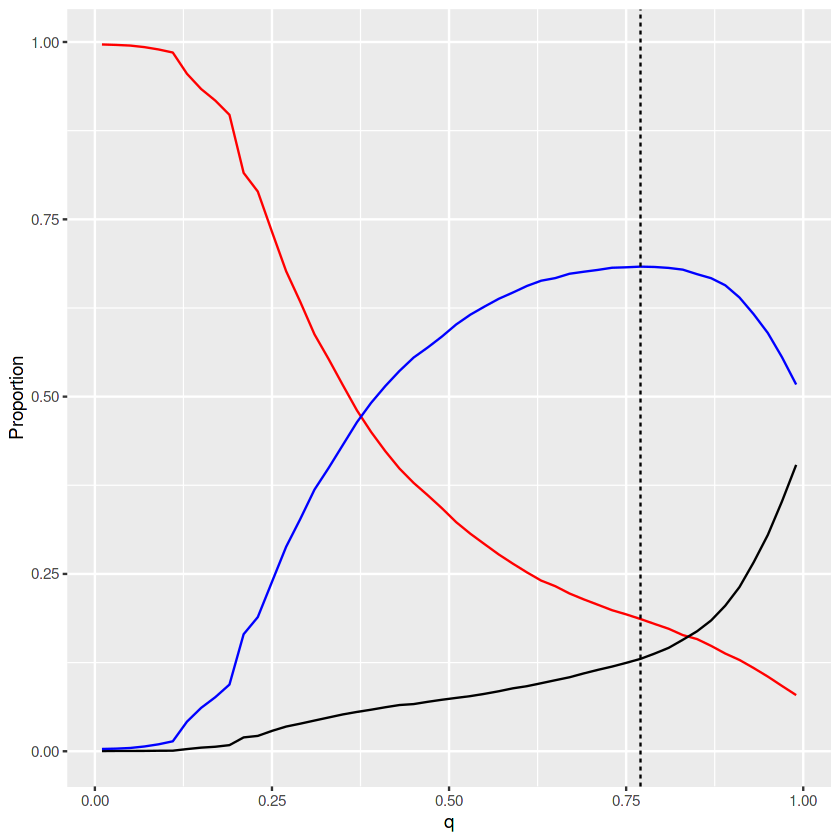

In [7]:
# Sample classification
## Round 1 -----------------------------------------------------------------------------------------------------
## Perform Quantile Sweep
bar.table.full <- x[,1:24]
good.bars <- paste("Bar",1:24,sep="")  # NOTE: In this hypothetical example, barcodes 91-96 were not detected
bar.table <- bar.table.full[, good.bars]  # Remove missing bars and summary columns
bar.table_sweep.list <- list()
n <- 0
for (q in seq(0.01, 0.99, by=0.02)) {
  print(q)
  n <- n + 1
  bar.table_sweep.list[[n]] <- classifyCells(bar.table, q=q)
  names(bar.table_sweep.list)[n] <- paste("q=",q,sep="")
}

## Identify ideal inter-maxima quantile to set barcode-specific thresholds
threshold.results1 <- findThresh(call.list=bar.table_sweep.list)
ggplot(data=threshold.results1$res, aes(x=q, y=Proportion, color=Subset)) + geom_line() + theme(legend.position = "none") +
  geom_vline(xintercept=threshold.results1$extrema, lty=2) + scale_color_manual(values=c("red","black","blue"))

## Finalize round 1 classifications, remove negative cells
round1.calls <- classifyCells(bar.table, q=findQ(threshold.results1$res, threshold.results1$extrema))
neg.cells <- names(round1.calls)[which(round1.calls == "Negative")]
bar.table <- bar.table[-which(rownames(bar.table) %in% neg.cells), ]


In [8]:
table(round1.calls)
length(round1.calls)

round1.calls
    Bar1    Bar10    Bar11    Bar12    Bar13    Bar14    Bar15    Bar16 
     608      235      217      395      168      277      505      556 
   Bar17    Bar18    Bar19     Bar2    Bar20    Bar21    Bar22    Bar23 
     336      229      240      284      201      224      497      633 
   Bar24     Bar3     Bar4     Bar5     Bar6     Bar7     Bar8     Bar9 
     276      233      706      255      548      264      483      342 
 Doublet Negative 
    2378     1660 

[1] 12750

In [9]:
## Round 2 -----------------------------------------------------------------------------------------------------
bar.table_sweep.list <- list()
n <- 0
for (q in seq(0.01, 0.99, by=0.02)) {
  print(q)
  n <- n + 1
  bar.table_sweep.list[[n]] <- classifyCells(bar.table, q=q)
  names(bar.table_sweep.list)[n] <- paste("q=",q,sep="")
}

threshold.results2 <- findThresh(call.list=bar.table_sweep.list)
round2.calls <- classifyCells(bar.table, q=findQ(threshold.results2$res, threshold.results2$extrema))
neg.cells <- c(neg.cells, names(round2.calls)[which(round2.calls == "Negative")])

[1] 0.01
[1] 0.03
[1] 0.05
[1] 0.07
[1] 0.09
[1] 0.11
[1] 0.13
[1] 0.15
[1] 0.17
[1] 0.19
[1] 0.21
[1] 0.23
[1] 0.25
[1] 0.27
[1] 0.29
[1] 0.31
[1] 0.33
[1] 0.35
[1] 0.37
[1] 0.39
[1] 0.41
[1] 0.43
[1] 0.45
[1] 0.47
[1] 0.49
[1] 0.51
[1] 0.53
[1] 0.55
[1] 0.57
[1] 0.59
[1] 0.61
[1] 0.63
[1] 0.65
[1] 0.67
[1] 0.69
[1] 0.71
[1] 0.73
[1] 0.75
[1] 0.77
[1] 0.79
[1] 0.81
[1] 0.83
[1] 0.85
[1] 0.87
[1] 0.89
[1] 0.91
[1] 0.93
[1] 0.95
[1] 0.97
[1] 0.99


In [10]:
length(neg.cells)

table(round2.calls)
length(round2.calls)

[1] 1672

round2.calls
    Bar1    Bar10    Bar11    Bar12    Bar13    Bar14    Bar15    Bar16 
     609      235      217      396      165      278      505      556 
   Bar17    Bar18    Bar19     Bar2    Bar20    Bar21    Bar22    Bar23 
     335      228      240      284      201      224      497      631 
   Bar24     Bar3     Bar4     Bar5     Bar6     Bar7     Bar8     Bar9 
     276      234      702      254      549      263      479      342 
 Doublet Negative 
    2378       12 

[1] 11090

In [11]:
## Round 3 -----------------------------------------------------------------------------------------------------
bar.table_sweep.list <- list()
n <- 0
for (q in seq(0.01, 0.99, by=0.02)) {
  print(q)
  n <- n + 1
  bar.table_sweep.list[[n]] <- classifyCells(bar.table, q=q)
  names(bar.table_sweep.list)[n] <- paste("q=",q,sep="")
}

threshold.results3 <- findThresh(call.list=bar.table_sweep.list)
round3.calls <- classifyCells(bar.table, q=findQ(threshold.results3$res, threshold.results3$extrema))
neg.cells <- c(neg.cells, names(round3.calls)[which(round3.calls == "Negative")])

[1] 0.01
[1] 0.03
[1] 0.05
[1] 0.07
[1] 0.09
[1] 0.11
[1] 0.13
[1] 0.15
[1] 0.17
[1] 0.19
[1] 0.21
[1] 0.23
[1] 0.25
[1] 0.27
[1] 0.29
[1] 0.31
[1] 0.33
[1] 0.35
[1] 0.37
[1] 0.39
[1] 0.41
[1] 0.43
[1] 0.45
[1] 0.47
[1] 0.49
[1] 0.51
[1] 0.53
[1] 0.55
[1] 0.57
[1] 0.59
[1] 0.61
[1] 0.63
[1] 0.65
[1] 0.67
[1] 0.69
[1] 0.71
[1] 0.73
[1] 0.75
[1] 0.77
[1] 0.79
[1] 0.81
[1] 0.83
[1] 0.85
[1] 0.87
[1] 0.89
[1] 0.91
[1] 0.93
[1] 0.95
[1] 0.97
[1] 0.99


In [12]:
length(neg.cells)

table(round3.calls)
length(round3.calls)

[1] 1684

round3.calls
    Bar1    Bar10    Bar11    Bar12    Bar13    Bar14    Bar15    Bar16 
     609      235      217      396      165      278      505      556 
   Bar17    Bar18    Bar19     Bar2    Bar20    Bar21    Bar22    Bar23 
     335      228      240      284      201      224      497      631 
   Bar24     Bar3     Bar4     Bar5     Bar6     Bar7     Bar8     Bar9 
     276      234      702      254      549      263      479      342 
 Doublet Negative 
    2378       12 

[1] 11090

In [13]:
## Repeat until all no negative cells remain (usually 3 rounds)...
final.calls <- c(round3.calls, rep("Negative",length(neg.cells)))
names(final.calls) <- c(names(round3.calls),neg.cells)

In [14]:
head(bar.table)
dim(bar.table)

,Bar1,Bar2,Bar3,Bar4,Bar5,Bar6,Bar7,Bar8,Bar9,Bar10,⋯,Bar15,Bar16,Bar17,Bar18,Bar19,Bar20,Bar21,Bar22,Bar23,Bar24
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
AAACCCAAGAAGTCCG,12,34,2,3,4,6,4,7,37,32,⋯,8,12,12,7,1,3,184,4,6,3
AAACCCACACTTGAGT,4,0,3,1,3,8,1,9,6,5,⋯,11,1321,10,5,4,0,1,8,5,6
AAACCCACAGGACTAG,3,1,6,132,4,8,9,3,5,3,⋯,5,13,8,5,1,3,2,5,7,14
AAACCCAGTATCCCTC,1,3,4,2,4,188,3,2,4,6,⋯,10,5,7,6,2,4,1,5,4,6
AAACCCAGTGTAGGAC,7,1,2,5,5,0,45,3,7,10,⋯,35,15,94,7,4,1,6,4,247,14
AAACCCAGTGTTCAGT,4,0,5,1,4,1,5,3,6,6,⋯,7,11,8,2,2,217,4,16,16,5


[1] 11090    24

In [15]:
## Visualize barcode space
bar.tsne <- barTSNE(bar.table[,1:24]) 
## Note: Exclude columns 97:98 (assuming 96 barcodes were used) which provide total barcode UMI counts for each cell. 

pdf("./outputs/MULTIseq/120h_2_bc.check_round3.pdf")
for (i in 3:ncol(bar.tsne)) {
  g <- ggplot(bar.tsne, aes(x = TSNE1, y = TSNE2, color = bar.tsne[,i])) +
    geom_point() +
    scale_color_gradient(low = "black", high = "red") +
    ggtitle(colnames(bar.tsne)[i]) +
    theme(legend.position = "none") 
  print(g)
}
dev.off()

Performing PCA
Read the 11090 x 24 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
 - point 10000 of 11090
Done in 5.36 seconds (sparsity = 0.012463)!
Learning embedding...
Iteration 50: error is 96.778077 (50 iterations in 1.95 seconds)
Iteration 100: error is 91.259963 (50 iterations in 3.14 seconds)
Iteration 150: error is 84.971830 (50 iterations in 1.95 seconds)
Iteration 200: error is 83.949722 (50 iterations in 1.95 seconds)
Iteration 250: error is 83.523024 (50 iterations in 1.95 seconds)
Iteration 300: error is 3.082769 (50 iterations in 1.87 seconds)
Iteration 350: error is 2.755405 (50 iterations in 1.75 seconds)
Iteration 400: error is 2.587871 (50 iterations in 1.75 seconds)
Iteration 450: error is 2.482398 (50 iterations in 1.73 seconds)
Iteration 500: error is 2.408486 (50 iterations in 1.74 seconds)
Iteration 550: error is 2.352327 (50 iterations in 1

png 
  2

## Generation of barcode table

In [16]:
head(bar.table)
dim(bar.table)
bar.table$cell <- rownames(bar.table)

,Bar1,Bar2,Bar3,Bar4,Bar5,Bar6,Bar7,Bar8,Bar9,Bar10,⋯,Bar15,Bar16,Bar17,Bar18,Bar19,Bar20,Bar21,Bar22,Bar23,Bar24
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
AAACCCAAGAAGTCCG,12,34,2,3,4,6,4,7,37,32,⋯,8,12,12,7,1,3,184,4,6,3
AAACCCACACTTGAGT,4,0,3,1,3,8,1,9,6,5,⋯,11,1321,10,5,4,0,1,8,5,6
AAACCCACAGGACTAG,3,1,6,132,4,8,9,3,5,3,⋯,5,13,8,5,1,3,2,5,7,14
AAACCCAGTATCCCTC,1,3,4,2,4,188,3,2,4,6,⋯,10,5,7,6,2,4,1,5,4,6
AAACCCAGTGTAGGAC,7,1,2,5,5,0,45,3,7,10,⋯,35,15,94,7,4,1,6,4,247,14
AAACCCAGTGTTCAGT,4,0,5,1,4,1,5,3,6,6,⋯,7,11,8,2,2,217,4,16,16,5


[1] 11090    24

In [17]:
table(final.calls)
length(final.calls)

final.calls
    Bar1    Bar10    Bar11    Bar12    Bar13    Bar14    Bar15    Bar16 
     609      235      217      396      165      278      505      556 
   Bar17    Bar18    Bar19     Bar2    Bar20    Bar21    Bar22    Bar23 
     335      228      240      284      201      224      497      631 
   Bar24     Bar3     Bar4     Bar5     Bar6     Bar7     Bar8     Bar9 
     276      234      702      254      549      263      479      342 
 Doublet Negative 
    2378     1696 

[1] 12774

In [18]:
prueba <- as.matrix(final.calls)
prueba <- as.data.frame(prueba)
prueba$cell <- rownames(prueba)
table(prueba$V1)

prueba.merged <- merge (bar.table, prueba, by = "cell")
prueba.merged$V1 <- as.character(prueba.merged$V1)

barcode_assignment_120h_2 <- prueba.merged
head(barcode_assignment_120h_2)
dim(barcode_assignment_120h_2)
table(barcode_assignment_120h_2$V1)


    Bar1    Bar10    Bar11    Bar12    Bar13    Bar14    Bar15    Bar16 
     609      235      217      396      165      278      505      556 
   Bar17    Bar18    Bar19     Bar2    Bar20    Bar21    Bar22    Bar23 
     335      228      240      284      201      224      497      631 
   Bar24     Bar3     Bar4     Bar5     Bar6     Bar7     Bar8     Bar9 
     276      234      702      254      549      263      479      342 
 Doublet Negative 
    2378     1696 

,cell,Bar1,Bar2,Bar3,Bar4,Bar5,Bar6,Bar7,Bar8,Bar9,⋯,Bar16,Bar17,Bar18,Bar19,Bar20,Bar21,Bar22,Bar23,Bar24,V1
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,AAACCCAAGAAGTCCG,12,34,2,3,4,6,4,7,37,⋯,12,12,7,1,3,184,4,6,3,Bar21
2,AAACCCACACTTGAGT,4,0,3,1,3,8,1,9,6,⋯,1321,10,5,4,0,1,8,5,6,Bar16
3,AAACCCACAGGACTAG,3,1,6,132,4,8,9,3,5,⋯,13,8,5,1,3,2,5,7,14,Bar4
4,AAACCCAGTATCCCTC,1,3,4,2,4,188,3,2,4,⋯,5,7,6,2,4,1,5,4,6,Bar6
5,AAACCCAGTGTAGGAC,7,1,2,5,5,0,45,3,7,⋯,15,94,7,4,1,6,4,247,14,Bar23
6,AAACCCAGTGTTCAGT,4,0,5,1,4,1,5,3,6,⋯,11,8,2,2,217,4,16,16,5,Bar20


[1] 11090    26


    Bar1    Bar10    Bar11    Bar12    Bar13    Bar14    Bar15    Bar16 
     609      235      217      396      165      278      505      556 
   Bar17    Bar18    Bar19     Bar2    Bar20    Bar21    Bar22    Bar23 
     335      228      240      284      201      224      497      631 
   Bar24     Bar3     Bar4     Bar5     Bar6     Bar7     Bar8     Bar9 
     276      234      702      254      549      263      479      342 
 Doublet Negative 
    2378       12 

## Generation of table of assignment for stacked barplot visualization

In [19]:
x <- data.frame(table(barcode_assignment_120h_2$V1))
x

Var1,Freq
<fct>,<int>
Bar1,609
Bar10,235
Bar11,217
Bar12,396
Bar13,165
Bar14,278
Bar15,505
Bar16,556
Bar17,335


In [20]:
bar <- sum(x$Freq[-(25:26)])
doublet <- x[x[1]=='Doublet',2]
negative <- x[x[1]=='Negative',2]
unassigned <- initial_cell_number - sum(bar, doublet, negative)
unassigned

[1] 1660

In [21]:
x <- data.frame(Number_cells= c(bar, doublet, negative, unassigned))
rownames(x) <- c("Barcode_assigned","Doublet","Negative", "Unassigned")
x$Category <- rownames(x)
x$Category <- factor(x$Category, levels = c("Unassigned","Negative","Doublet","Barcode_assigned"))
x$Sample <- "gast_120h_2"
head(x)

multiseq_assignment_120h_2 <- x

,Number_cells,Category,Sample
,<int>,<fct>,<chr>
Barcode_assigned,8700,Barcode_assigned,gast_120h_2
Doublet,2378,Doublet,gast_120h_2
Negative,12,Negative,gast_120h_2
Unassigned,1660,Unassigned,gast_120h_2


In [25]:
sum(multiseq_assignment_120h_2$Number_cells)
initial_cell_number
sum(multiseq_assignment_120h_2$Number_cells) == initial_cell_number

[1] 12750

[1] 12750

[1] TRUE

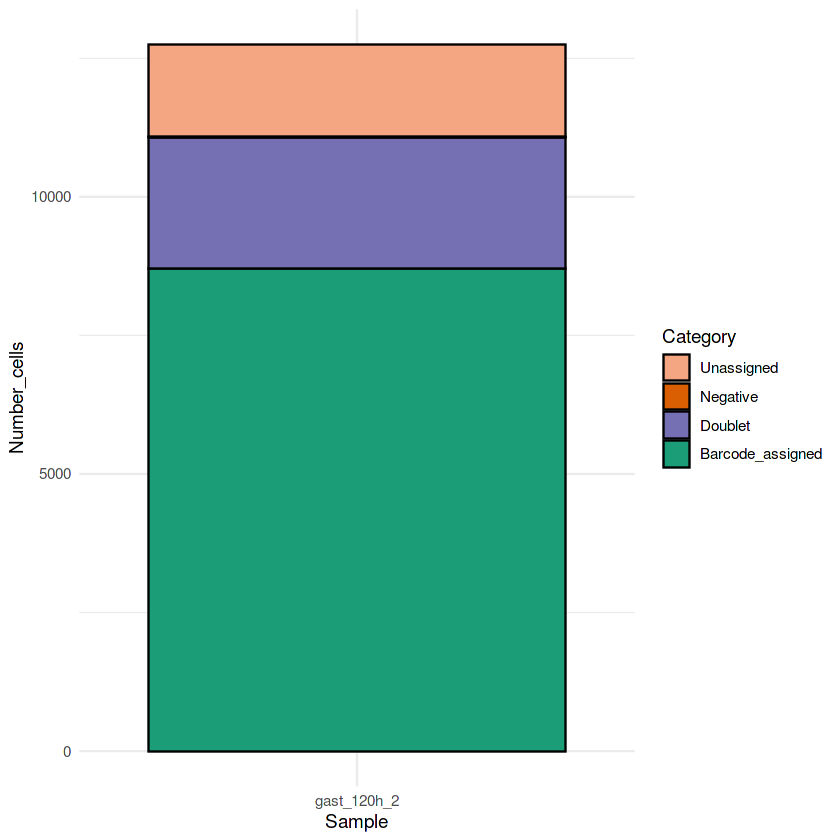

In [26]:
# Stacked
ggplot(x, aes(fill=Category, y=Number_cells, x=Sample)) + 
  geom_bar(position="stack", stat="identity", colour="black") +
  scale_fill_manual(values=c("#f4a582", "#d95f02", "#7570b3", "#1b9e77")) + 
  theme_minimal()

## Saving the files

In [27]:
# Save files
## 
saveRDS(barcode_assignment_120h_2, file = "./files/demultiplexing/barcode_assignment_120h_2.rds")
saveRDS(multiseq_assignment_120h_2, file = "./files/demultiplexing/multiseq_assignment_120h_2.rds")